In [0]:
from google.colab import drive 
drive.mount('/mntDrive') 
!ls "/mntDrive/My Drive/Colab Notebooks"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /mntDrive
 ApacheSpark				    Linear-Regression.ipynb
 Apriori-Algorithm.ipynb		    Mean-Square-Method.ipynb
 Apriori-ARM-Assignment.ipynb		    pima1.csv
'car data.csv'				    Real-Estate-Pricing.ipynb
 Cosmetics.xlsx				    real.xlsx
 Introduction-To-Data-PreProcessing.ipynb   salary_data.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_excel('/mntDrive/My Drive/Colab Notebooks/real.xlsx')

In [0]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [0]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [0]:
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [0]:
df.isnull().values.any()

False

In [0]:
(df['beds'] == 0).sum(), (df['baths'] == 0).sum(), (df['sq__ft'] == 0).sum(), (df['price'] == 0).sum()

(108, 108, 171, 0)

In [0]:
z_field = ['beds', 'baths', 'sq__ft']
df.non_zero = df.copy()
df[z_field] = df[z_field].replace(0, np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [0]:
df[z_field] = df[z_field].fillna(df.non_zero.mean())

In [0]:
(df['beds'] == 0).sum(), (df['baths'] == 0).sum(), (df['sq__ft'] == 0).sum(), (df['price'] == 0).sum()

(0, 0, 0, 0)

In [0]:
df['street'].nunique()

981

In [0]:
df['city'].nunique()

39

In [0]:
maxPrice = df.groupby('city')['price'].max()

In [0]:
minPrice = df.groupby('city')['price'].min()

In [0]:
print(minPrice, maxPrice)

city
ANTELOPE           115000
AUBURN             260000
CAMERON PARK       119000
CARMICHAEL         139500
CITRUS HEIGHTS      30000
COOL               300000
DIAMOND SPRINGS    216033
EL DORADO          205000
EL DORADO HILLS    235738
ELK GROVE           71000
ELVERTA            126000
FAIR OAKS          142500
FOLSOM             200000
FORESTHILL         194818
GALT               106716
GARDEN VALLEY      490000
GOLD RIVER         299000
GRANITE BAY        600000
GREENWOOD          395000
LINCOLN              1551
LOOMIS             295000
MATHER             237800
MEADOW VISTA       230000
NORTH HIGHLANDS     63000
ORANGEVALE         183200
PENRYN             506688
PLACERVILLE        205000
POLLOCK PINES      175000
RANCHO CORDOVA      94905
RANCHO MURIETA      97750
RIO LINDA           30000
ROCKLIN            230095
ROSEVILLE          115000
SACRAMENTO          40000
SHINGLE SPRINGS    275000
SLOUGHHOUSE          2000
WALNUT GROVE       380000
WEST SACRAMENTO    147000
WILTON 

In [0]:
import seaborn as sns

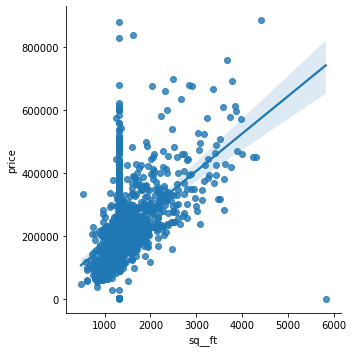

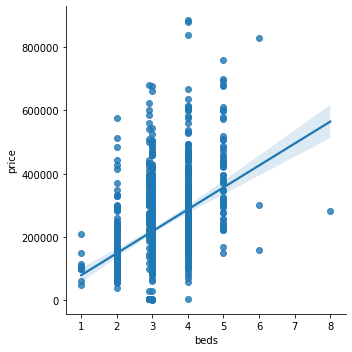

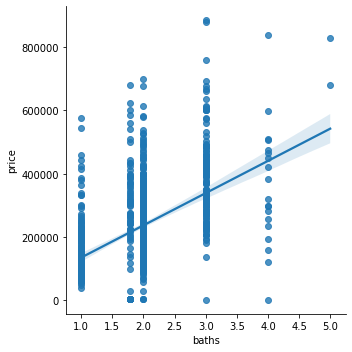

In [0]:
sns.lmplot(x='sq__ft', y='price', data=df)
plt.show()
sns.lmplot(x='beds', y='price', data=df)
plt.show()
sns.lmplot(x='baths', y='price', data=df)
plt.show()

In [0]:
df.corr(method ='kendall')

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.018953,-0.005025,-0.016095,-0.067694,-0.080830,-0.364485
beds,0.018953,1.000000,0.615725,0.528635,0.322866,-0.115128,0.018372
baths,-0.005025,0.615725,1.000000,0.535217,0.366823,-0.073400,0.068689
sq__ft,-0.016095,0.528635,0.535217,1.000000,0.415124,-0.083057,0.051609
price,-0.067694,0.322866,0.366823,0.415124,1.000000,-0.018218,0.129167
latitude,-0.080830,-0.115128,-0.073400,-0.083057,-0.018218,1.000000,0.281511
longitude,-0.364485,0.018372,0.068689,0.051609,0.129167,0.281511,1.000000


In [0]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()

longitude  longitude    1.000000
sq__ft     baths        0.666713
beds       baths        0.664115
sq__ft     beds         0.650869
price      sq__ft       0.525367
baths      price        0.475334
price      beds         0.412636
latitude   longitude    0.387925
price      longitude    0.284485
baths      longitude    0.132186
beds       longitude    0.054626
longitude  sq__ft       0.044055
beds       zip         -0.038355
baths      latitude    -0.039411
price      latitude    -0.039573
zip        sq__ft      -0.043852
baths      zip         -0.088795
beds       latitude    -0.093180
price      zip         -0.093353
sq__ft     latitude    -0.159076
latitude   zip         -0.290389
zip        longitude   -0.539904
dtype: float64

In [0]:
covariance = np.cov(df['sq__ft'], df['price'])
print(covariance)

[[3.75061406e+05 4.45187121e+07]
 [4.45187121e+07 1.91451054e+10]]


In [0]:
X = df['sq__ft'].values.reshape(-1,1)'
Y = df['price']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

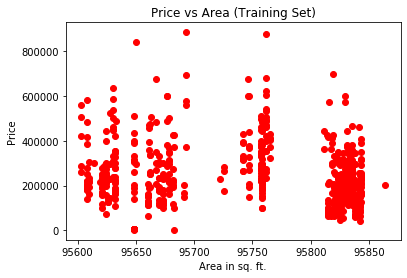

In [0]:
train = plt
train.scatter(x_train[:,0], y_train, color = 'red')
train.title('Price vs Area (Training Set)')
train.xlabel('Area in sq. ft.')
train.ylabel('Price')
train.show()

In [0]:
y_pred = regressor.predict(x_test)
print('Actual values' + '\tPredicted Values' +'\tError')
err = y_test - y_pred
for i in zip(y_test, y_pred, err):
  print(i)

Actual values	Predicted Values	Error
(211500, 277965.8547430709, -66465.8547430709)
(395100, 461220.98000498116, -66120.98000498116)
(129000, 176574.71872787923, -47574.718727879226)
(124000, 214901.57854366302, -90901.57854366302)
(176850, 229270.45445470512, -52420.45445470512)
(480000, 283787.9416678846, 196212.0583321154)
(220000, 114040.36592538655, 105959.63407461345)
(610000, 433173.47398969904, 176826.52601030096)
(362305, 210345.8336963728, 151959.1663036272)
(325000, 354846.1900641769, -29846.190064176917)
(130000, 183708.0011077039, -53708.001107703894)
(215000, 198580.84727532417, 16419.152724675834)
(339000, 299549.7818142846, 39450.21818571538)
(270000, 278234.5796999261, -8234.579699926078)
(300567, 253124.43466816097, 47442.565331839025)
(108750, 191347.77522680908, -82597.77522680908)
(145846, 244939.9522729069, -99093.9522729069)
(4897, 193356.8773895651, -188459.8773895651)
(460000, 471428.752281487, -11428.752281486988)
(339000, 149439.7550536506, 189560.2449463494)

In [0]:
regressor.score(x_test,y_test)

0.41449565136251293